In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.rcParams.update({'axes.labelsize': 'x-large'})

In [2]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return pos_encoding

(1, 64, 96)


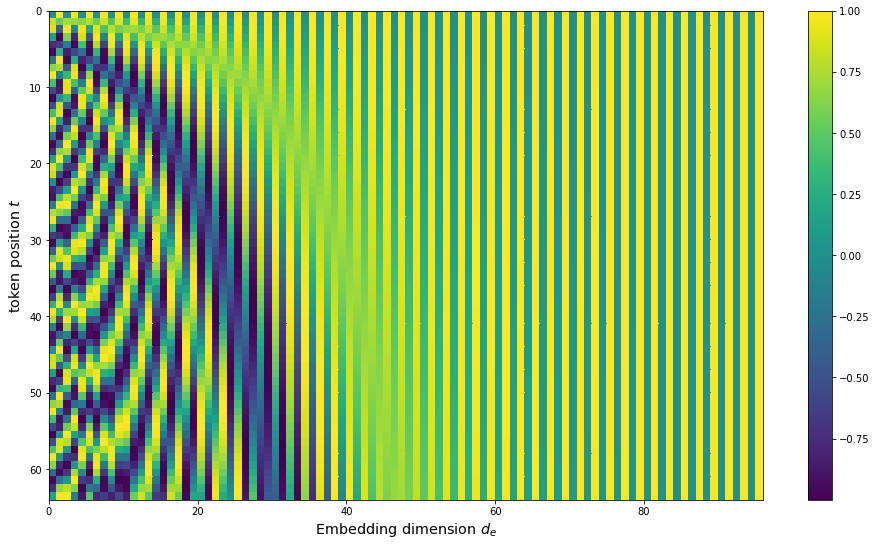

In [23]:
tokens = 64
dimensions = 96

pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)

plt.figure(figsize=(16,9))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding dimension $d_e$')
plt.xlim((0, dimensions))
plt.ylim((tokens, 0))
plt.ylabel('token position $t$')
plt.colorbar()
plt.show()